<a href="https://colab.research.google.com/github/shivanshu1303/Simple-ML-Algos-Implemented/blob/main/K-Nearest%20Implemented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here, I will implement the `K-Nearest Neighbours` algorithm. This is a classification algorithm. Given a data point, it tells use which one(of a multiple) class does the point belong to.

## To do this, it simply uses a *popularity vote*. That is, it takes `k` of the other nearest points to the input point and uses their categories to assign a category to the point. Hence, the use of the term 'Popularity Contest'

### To do this, we first import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

### Next, we define the euclidean distance i.e. our measure for actually knowing the `nearest neighbours`

In [2]:
def euclidean_distance(x1,x2):
  dist=np.sqrt(np.sum((x1-x2)**2))
  return dist

### Now, we write a function to predict the class for a single observation

In [3]:
"""
def predict_one(X_train,y_train,x_test,k):
  distances=[]
  for i in range(len(X_train)):
    distance=euclidean_distance(x_test,X_train[i])
    distances.append((distance,y_train[i]))

  distances.sort(key= lambda x:x[0])
  neighbours=distances[:k]
  output_values=[neighbour[1] for neighbour in neighbours]
  prediction=Counter(output_values).most_common(1)[0][0]

  return prediction
"""

def predict_one(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(x_test, X_train[i])
        distances.append((distance, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    # If all k neighbors have the same class label, return that class label.
    # Otherwise, return the most common class label.
    if all(y == neighbors[0][1] for y in [n[1] for n in neighbors]):
        return neighbors[0][1]
    else:
        output_values = [neighbor[1] for neighbor in neighbors]
        prediction = Counter(output_values).most_common(1)[0][0]
        return prediction

### After this, we extend this function to the entire test dataset

In [4]:
def predict(X_train,y_train,X_test,k):
  predictions=[]
  for x_test in X_test:
    pred=predict_one(X_train,y_train,x_test,k)
    predictions.append(pred)

  return predictions

### After this, we would also want to calculate the accuracy of our model - maybe just in general or by using different k values

In [5]:
def accuracy(y_pred,y_true):
  accuracy=(np.sum(y_pred==y_true))/len(y_pred)
  return accuracy

### Now, all that is left is to actually test our code

In [6]:
X_train = np.array([[2, 4], [4, 2], [4, 4], [6, 2], [1, 3], [3, 1]])
y_train = np.array([0, 0, 1, 1, 0, 0])

In [10]:
X_test = np.array([[3, 3], [5, 1]])
y_test = np.array([0, 0])

In [11]:
k = 3
predictions = predict(X_train, y_train, X_test, k)

## Now, we evaluate the model

In [14]:
print(f"Predictions: {predictions}")
print(f"Accuracy: {100*accuracy(y_test, predictions)}%")

Predictions: [0, 0]
Accuracy: 100.0%


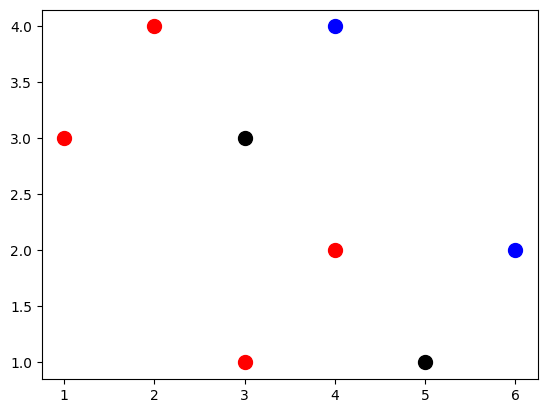

In [27]:
for i in range(len(X_test)):
  plt.scatter(X_test[i][0], X_test[i][1], color='black',s=100)

for j in range(len(X_train)):
    if y_train[j] == 0:
        plt.scatter(X_train[j][0], X_train[j][1], color='red',s=100)
    else:
        plt.scatter(X_train[j][0], X_train[j][1], color='blue',s=100)

plt.show()

### Here, we see that with a `k` value of 3, the algorithm correctly predicts the class for both of our points. However, if we alter the value of `k`, the prediction would change too and so would our accuracy.